In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Ensure the project root is in the path so we can import ir_models
module_path = os.path.abspath(os.getcwd())
if module_path not in sys.path:
    sys.path.append(module_path)

from ir_models.models.g2pp import G2ppModel

**Reminder:**

Two-factor Gaussian (G2++) dynamics for the zero-mean factors $x,y$:

$\displaystyle dx_t = -a\,x_t\,dt + \sigma\,dW_t^{(1)},$

$\displaystyle dy_t = -b\,y_t\,dt + \eta\,dW_t^{(2)},$

with $\mathrm{corr}(dW^{(1)},dW^{(2)})=\rho$. The short rate is assembled as

$\displaystyle r_t = x_t + y_t + \phi(t)$,

where $\phi(t)$ is a deterministic shift (used to fit the observed term structure).

The simulation uses the Euler-Maruyama discretization scheme with correlated Brownian motions generated via Cholesky decomposition.

In [9]:
# Define model parameters
model = G2ppModel(
    a=0.01,       # 1% mean reversion for first factor
    b=0.50,       # 50% mean reversion for second factor
    sigma=0.015,  # Volatility of first factor
    eta=0.010,    # Volatility of second factor
    rho=-0.60,    # Negative correlation between factors
    x0=0.0,       # Initial value of first factor
    y0=0.0,       # Initial value of second factor
    r0=0.025,     # Initial short rate (2.5%)
)

print("G2++ Model Parameters:")
print(f"  Mean reversion a: {model.a:.4f}")
print(f"  Mean reversion b: {model.b:.4f}")
print(f"  Volatility σ: {model.sigma:.4f}")
print(f"  Volatility η: {model.eta:.4f}")
print(f"  Correlation ρ: {model.rho:.4f}")
print(f"  Initial short rate r₀: {model.r0:.4f}")

G2++ Model Parameters:
  Mean reversion a: 0.0100
  Mean reversion b: 0.5000
  Volatility σ: 0.0150
  Volatility η: 0.0100
  Correlation ρ: -0.6000
  Initial short rate r₀: 0.0250


In [10]:
# Simulation parameters
T = 5.0              # Time horizon in years
n_steps = 360        # Number of time steps (monthly = 60, daily ≈ 1260)
n_simulations = 10000  # Number of Monte Carlo paths

print(f"Running Monte Carlo simulation...")
print(f"  Time horizon: {T} years")
print(f"  Time steps: {n_steps}")
print(f"  Number of paths: {n_simulations}")
print(f"  dt = {T/n_steps:.4f} years")

# Run simulation
sim_result = model.simulate_paths(
    T=T,
    n_steps=n_steps,
    n_simulations=n_simulations,
    random_seed=42,  # For reproducibility
)

print("\nSimulation complete!")
print(f"  Shape of short rate paths: {sim_result.short_rate_paths.shape}")
print(f"  Shape of x factor paths: {sim_result.x_paths.shape}")
print(f"  Shape of y factor paths: {sim_result.y_paths.shape}")

Running Monte Carlo simulation...
  Time horizon: 5.0 years
  Time steps: 360
  Number of paths: 10000
  dt = 0.0139 years

Simulation complete!
  Shape of short rate paths: (10000, 361)
  Shape of x factor paths: (10000, 361)
  Shape of y factor paths: (10000, 361)

Simulation complete!
  Shape of short rate paths: (10000, 361)
  Shape of x factor paths: (10000, 361)
  Shape of y factor paths: (10000, 361)


In [11]:
# Summary statistics at final time T
final_rates = sim_result.short_rate_paths[:, -1]
final_x = sim_result.x_paths[:, -1]
final_y = sim_result.y_paths[:, -1]

print(f"Summary statistics at T = {T} years:")
print(f"\nShort rate r(T):")
print(f"  Mean: {final_rates.mean():.4f}")
print(f"  Std:  {final_rates.std():.4f}")
print(f"  Min:  {final_rates.min():.4f}")
print(f"  Max:  {final_rates.max():.4f}")
print(f"  Median: {np.median(final_rates):.4f}")
print(f"\nFactor x(T):")
print(f"  Mean: {final_x.mean():.6f}")
print(f"  Std:  {final_x.std():.6f}")
print(f"\nFactor y(T):")
print(f"  Mean: {final_y.mean():.6f}")
print(f"  Std:  {final_y.std():.6f}")

Summary statistics at T = 5.0 years:

Short rate r(T):
  Mean: 0.0248
  Std:  0.0289
  Min:  -0.0742
  Max:  0.1500
  Median: 0.0250

Factor x(T):
  Mean: -0.000322
  Std:  0.032496

Factor y(T):
  Mean: 0.000112
  Std:  0.010008


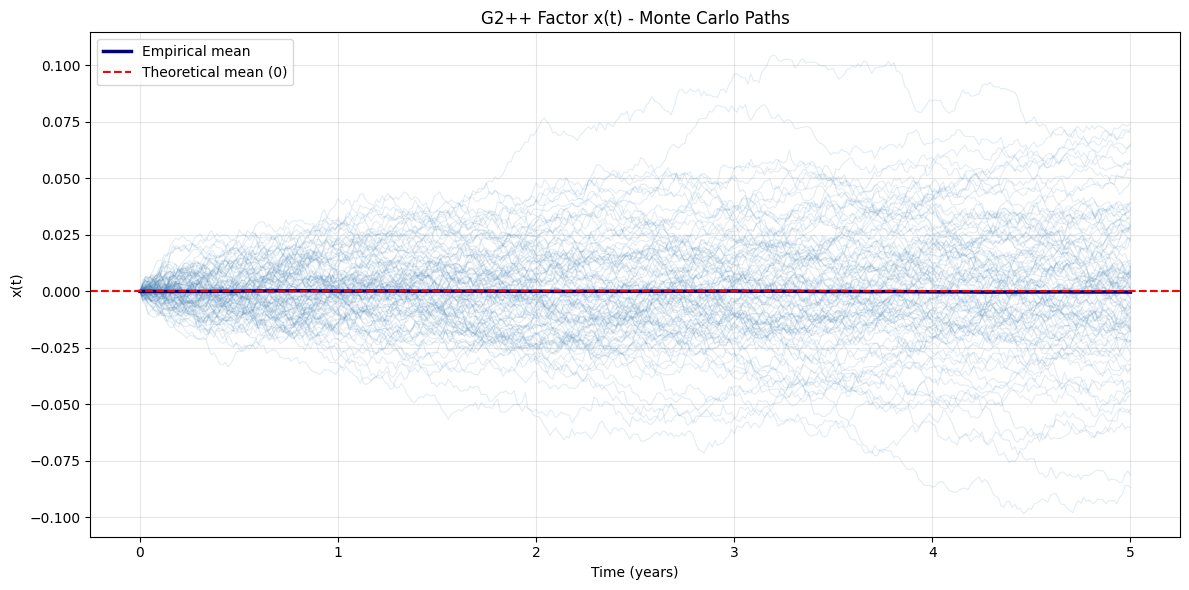

In [12]:
# Visualize factor x(t) paths
n_paths_to_plot = 100
time_grid = sim_result.time_grid
x_paths = sim_result.x_paths

plt.figure(figsize=(12, 6))
for i in range(min(n_paths_to_plot, n_simulations)):
    plt.plot(time_grid, x_paths[i], color='steelblue', alpha=0.15, linewidth=0.8)

# Add mean path
mean_x = x_paths.mean(axis=0)
plt.plot(time_grid, mean_x, color='darkblue', linewidth=2.5, label='Empirical mean')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Theoretical mean (0)')

plt.title('G2++ Factor x(t) - Monte Carlo Paths')
plt.xlabel('Time (years)')
plt.ylabel('x(t)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

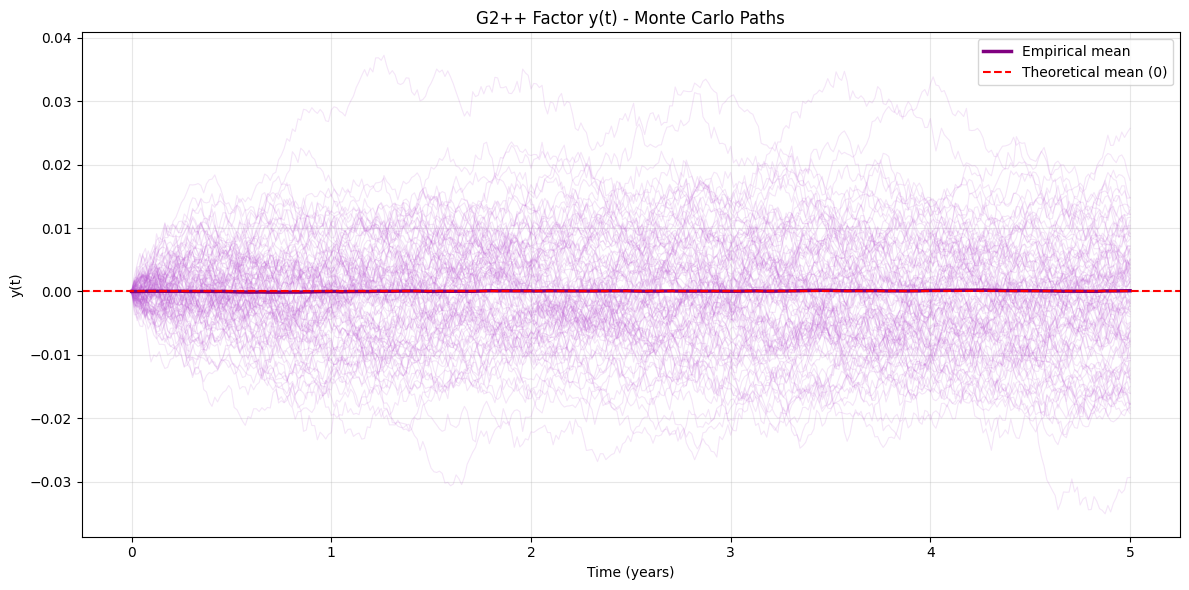

In [13]:
# Visualize factor y(t) paths
y_paths = sim_result.y_paths

plt.figure(figsize=(12, 6))
for i in range(min(n_paths_to_plot, n_simulations)):
    plt.plot(time_grid, y_paths[i], color='mediumorchid', alpha=0.15, linewidth=0.8)

# Add mean path
mean_y = y_paths.mean(axis=0)
plt.plot(time_grid, mean_y, color='purple', linewidth=2.5, label='Empirical mean')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Theoretical mean (0)')

plt.title('G2++ Factor y(t) - Monte Carlo Paths')
plt.xlabel('Time (years)')
plt.ylabel('y(t)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

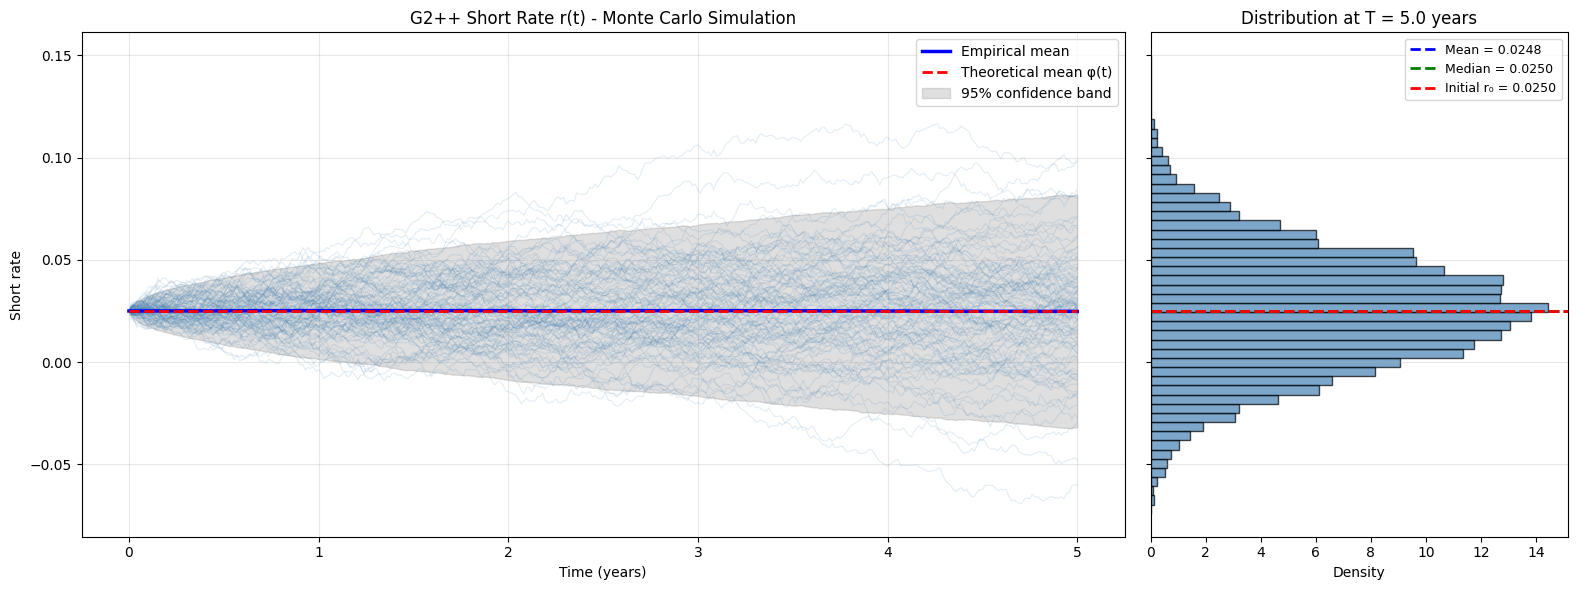

In [14]:
# Visualize short rate r(t) paths with confidence bands and distribution
short_rate_paths = sim_result.short_rate_paths
confidence_level = 0.95

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2.5, 1]}, sharey=True)

# Left plot: Time series with confidence bands
for i in range(min(n_paths_to_plot, n_simulations)):
    ax1.plot(time_grid, short_rate_paths[i], color='steelblue', alpha=0.15, linewidth=0.8)

# Add empirical mean
empirical_mean = short_rate_paths.mean(axis=0)
ax1.plot(time_grid, empirical_mean, color='blue', linewidth=2.5, label='Empirical mean')

# Add theoretical mean (phi function)
phi_grid = sim_result.phi_grid
ax1.plot(time_grid, phi_grid, color='red', linestyle='--', linewidth=2, label='Theoretical mean φ(t)')

# Add confidence bands
alpha = 1 - confidence_level
lower = np.percentile(short_rate_paths, alpha / 2 * 100, axis=0)
upper = np.percentile(short_rate_paths, (1 - alpha / 2) * 100, axis=0)
ax1.fill_between(time_grid, lower, upper, color='gray', alpha=0.25, label=f'{confidence_level:.0%} confidence band')

ax1.set_title('G2++ Short Rate r(t) - Monte Carlo Simulation')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Short rate')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right plot: Distribution at final time T (horizontal histogram for vertical orientation)
final_rates_t = short_rate_paths[:, -1]
ax2.hist(final_rates_t, bins=50, density=True, alpha=0.7, color='steelblue', 
         edgecolor='black', orientation='horizontal')
ax2.axhline(final_rates_t.mean(), color='blue', linestyle='--', linewidth=2, 
            label=f'Mean = {final_rates_t.mean():.4f}')
ax2.axhline(np.median(final_rates_t), color='green', linestyle='--', linewidth=2, 
            label=f'Median = {np.median(final_rates_t):.4f}')
ax2.axhline(model.r0, color='red', linestyle='--', linewidth=2, 
            label=f'Initial r₀ = {model.r0:.4f}')

ax2.set_title(f'Distribution at T = {T} years')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.tick_params(labelleft=False)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(fontsize=9)

plt.tight_layout()
plt.show()